In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.duplicated().sum() #check duplicated rows

np.int64(24)

In [6]:
df.drop_duplicates(inplace = True)

Text(0.5, 1.0, 'Variance Distribution')

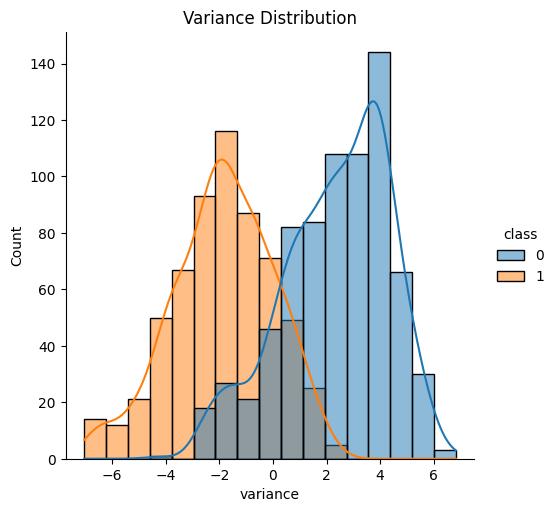

In [7]:
sns.displot(data = df, x = 'variance', hue = 'class', kde = True)
plt.title("Variance Distribution")

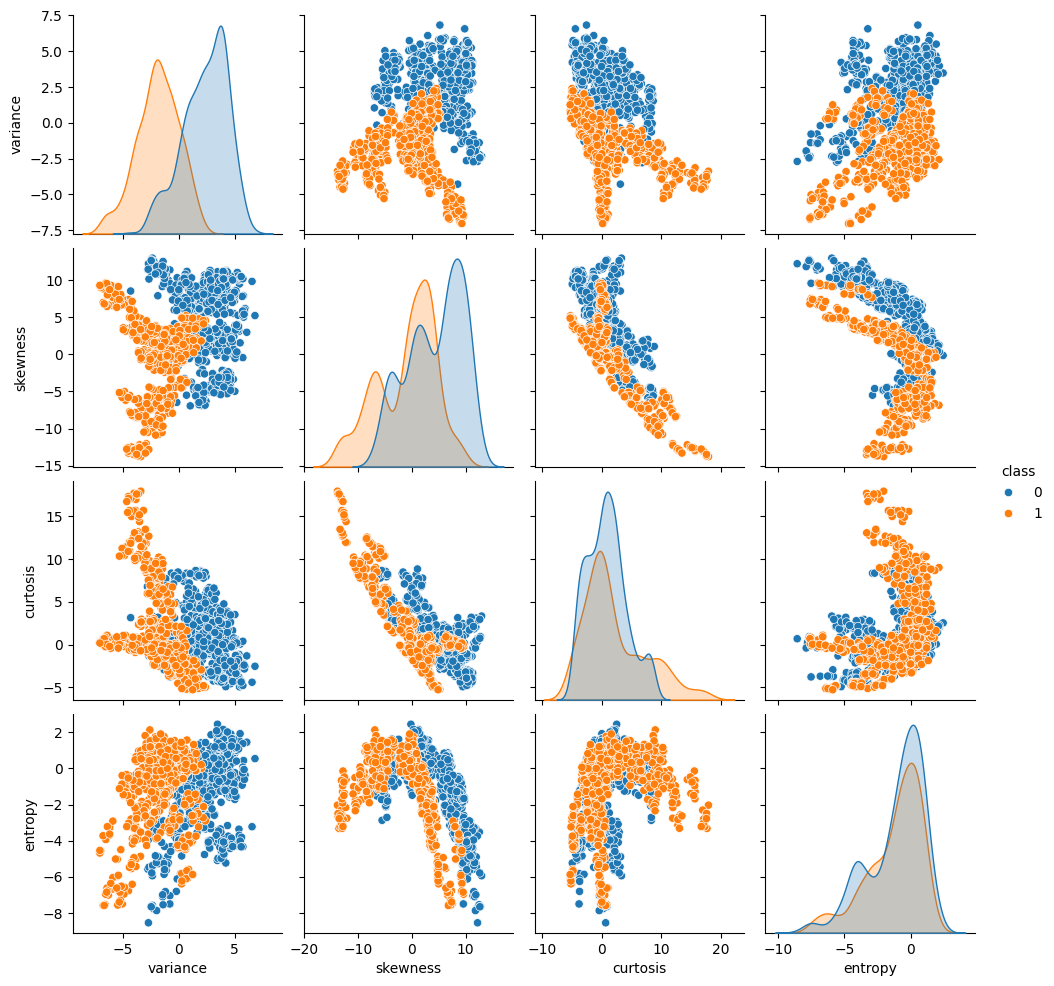

In [8]:
sns.pairplot(df, hue = 'class')

In [9]:
from sklearn.model_selection import train_test_split

features = ['variance', 'skewness', 'curtosis', 'entropy']
target = ['class']
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\User\Desktop\workspace2\MachineLearning-1\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
lr_acc_train = lr.score(X_train, y_train)
lr_acc_test = lr.score(X_test, y_test)
print(lr_acc_train, lr_acc_test, sep = "\n")

0.9916512059369202
0.9925925925925926


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [14]:
rf.fit(X_train, y_train)

c:\Users\User\Desktop\workspace2\MachineLearning-1\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [15]:
rf.score(X_test, y_test)

0.9814814814814815